# **Workflow**

1. Data Collection and Data Checking
2. Data Pre Processing 
3. Train  Test Split
4. Linear Regression Model & Lasso Regression Model
5. Trained The Data With Linear Or Lasso Model
6. Making a Prediction

## **Import Libraries**

Import the important module for this research.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## **Data Collection and Processing**

Data collection, processing, and checking if there the data have null, of course we don't want to have a null data and messy data right? then we must check it before we split and train the data.

In [21]:
# loading the data from csv file to pandas data frame
car_data = pd.read_csv('/content/car data.csv')

In [22]:
# Inspecting the first 5 rows of the data frame
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [23]:
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [24]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [25]:
# checking the shape
car_data.shape

(301, 9)

In [26]:
# getting some information about the data frame
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [27]:
# checking the number of missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [28]:
# checking the distribution of categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


## **Encoding the Categorical Data**

Encode the categorical data, why we must encode the data? because the model will not run properly.

In [29]:
# encoding "Fuel_Type" column
car_data.replace({'Fuel_Type':{'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)

# encoding "Seller_Type" column
car_data.replace({'Seller_Type':{'Dealer': 0, 'Individual': 1}}, inplace=True)

# encoding "Transmission" column
car_data.replace({'Transmission':{'Manual': 0, 'Automatic': 1}}, inplace=True)

In [30]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## **Splitting the Data and Target**

Before we want to make the data to Train and Test, we must split the data and choose which one we want to enter into the feature data and the target data.

In [31]:
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_data['Selling_Price']

In [32]:
print(X.head())

   Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
0  2014           5.59       27000          0            0             0      0
1  2013           9.54       43000          1            0             0      0
2  2017           9.85        6900          0            0             0      0
3  2011           4.15        5200          0            0             0      0
4  2014           6.87       42450          1            0             0      0


In [33]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


## **Splitting the Data**

After we split the data above, then we will split it into Train and Test data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=1)

## **Model Training**

And now, we will choose and evaluate which model is good to this data, and then make a predict.

1. Linear Regression

In [35]:
# loading Linear Regression Model
lin_reg = LinearRegression()

In [36]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Evaluation

In [37]:
# prediction on Training data
training_data_prediction = lin_reg.predict(X_train)

# prediction on Test data
test_data_prediction = lin_reg.predict(X_test)

In [38]:
# R squared Error

# Training Data 
error_tr = metrics.r2_score(y_train, training_data_prediction)
print(f'R-Squared Train : {error_tr}')

# Test Data
error_ts = metrics.r2_score(y_test, test_data_prediction)
print(f'R-Squared Test : {error_ts}')

R-Squared Train : 0.888658825760646
R-Squared Test : 0.3931106765727391


Visualize the actual prices and Predicted Prices

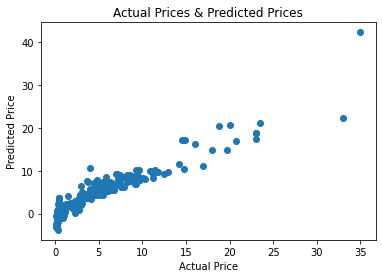

In [39]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices & Predicted Prices')
plt.show()

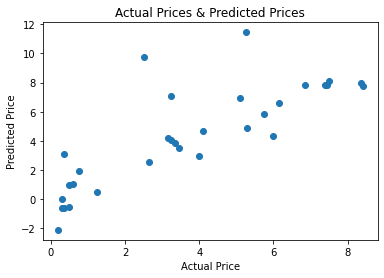

In [40]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices & Predicted Prices')
plt.show()

2. Lasso Regression

In [41]:
lass_model = Lasso()

In [42]:
lass_model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
# training data prediction
train_data_pred = lass_model.predict(X_train)

# test data prediction
test_data_pred = lass_model.predict(X_test)

In [44]:
# R2 Score

# Score Train
error_las_tr = metrics.r2_score(y_train, train_data_pred)
print(f'R2-Score : {error_las_tr}')

# Score Test
error_las_ts = metrics.r2_score(y_test, test_data_pred)
print(f'R2-Score : {error_las_ts}')

R2-Score : 0.8534437888277806
R2-Score : 0.46123204958260644


Visualize The Data

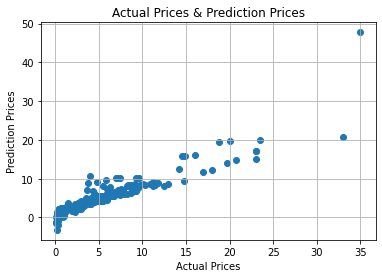

In [45]:
# train data
plt.scatter(y_train, train_data_pred)
plt.title('Actual Prices & Prediction Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Prediction Prices')
plt.grid(True)
plt.show()

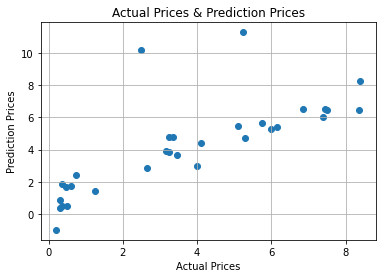

In [46]:
# test data
plt.scatter(y_test, test_data_pred)
plt.title('Actual Prices & Prediction Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Prediction Prices')
plt.grid(True)
plt.show()

## **Making a Predictive Program**

Linear Regression Predict

In [47]:
input_data = (2014, 5.59, 27000, 0, 0, 0, 0) # 

# Changing the data type to numpy array
change_input = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one instance
reshape_array = change_input.reshape(1, -1)

prediction = lin_reg.predict(reshape_array)
print(prediction)

[3.84212006]


Lasso Regression Predict

In [48]:
input_data = (2014, 5.59, 27000, 0, 0, 0, 0) # 

# Changing the data type to numpy array
change_input = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one instance
reshape_array = change_input.reshape(1, -1)

prediction = lass_model.predict(reshape_array)
print(prediction)

[3.81564695]
